In [152]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [114]:
df=pd.read_csv(r"weather_classification_data.csv")

In [115]:
df.isna().sum()

temperature             0
humidity                0
wind_speed              0
precipitation (%)       0
cloud_cover             0
atmospheric_pressure    0
uv_index                0
season                  0
visibility (km)         0
location                0
weather_type            0
dtype: int64

In [116]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [117]:
df.shape

(13200, 11)

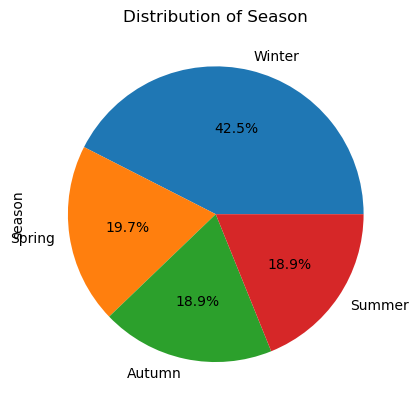

In [118]:
df["season"].value_counts().plot(kind="pie",autopct='%1.1f%%', title='Distribution of Season')
plt.show()

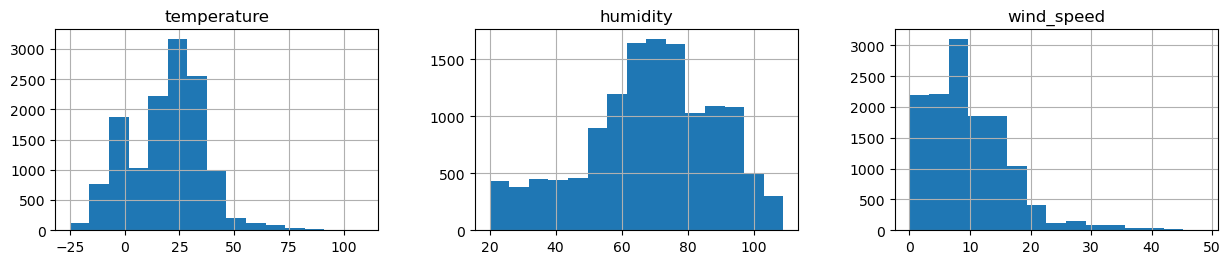

In [119]:
df[['temperature', 'humidity', 'wind_speed']].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

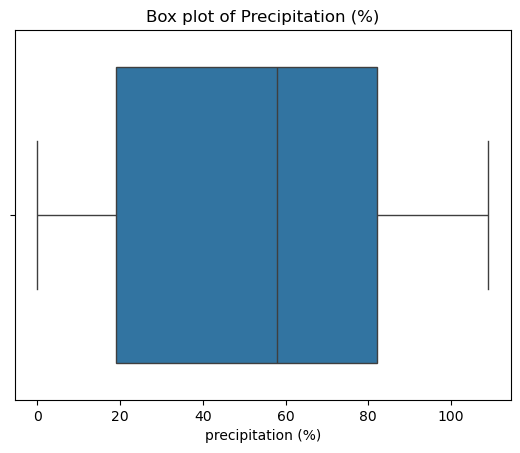

In [120]:
sns.boxplot(x='precipitation (%)', data=df)
plt.title('Box plot of Precipitation (%)')
plt.show()

In [121]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Hot_Encoding data

In [122]:
df=pd.get_dummies(df,columns=["cloud_cover","season","location"],drop_first=True)

In [123]:
df.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_Spring,season_Summer,season_Winter,location_inland,location_mountain
0,14,73,9.5,82,1010.82,2,3.5,Rainy,0,0,1,0,0,1,1,0
1,39,96,8.5,71,1011.43,7,10.0,Cloudy,0,0,1,1,0,0,1,0
2,30,64,7.0,16,1018.72,5,5.5,Sunny,0,0,0,1,0,0,0,1
3,38,83,1.5,82,1026.25,7,1.0,Sunny,0,0,0,1,0,0,0,0
4,27,74,17.0,66,990.67,1,2.5,Rainy,0,1,0,0,0,1,0,1


### Scaling of data

In [124]:
Scaling_features=["temperature","humidity","wind_speed","precipitation (%)","atmospheric_pressure", 'uv_index', 'visibility (km)']
scaler=StandardScaler()
df[Scaling_features]=scaler.fit_transform(df[Scaling_features])

In [125]:
df.head(4)

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_Spring,season_Summer,season_Winter,location_inland,location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,0,0,1,0,0,1,1,0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,0,0,1,1,0,0,1,0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,0,0,0,1,0,0,0,1
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,0,0,0,1,0,0,0,0


In [126]:
X=df.drop("weather_type",axis=1)
y=df["weather_type"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### First model using the Linear kernel.

In [127]:
model_1=SVC(kernel="linear")

In [128]:
model_1.fit(X_train,y_train)

SVC(kernel='linear')

In [129]:
y_pred_1=model_1.predict(X_test)

In [130]:
print(f"The Score of 1st model Using kernel=Linear is :{model_1.score(X_test,y_test)}")

The Score of 1st model Using kernel=Linear is :0.884090909090909


In [131]:
Report_1= classification_report(y_test,y_pred_1)

In [148]:
print(f"The Classification_Report of 1st model Using kernel=Linear is :\n\n{Report_1}")
print("Number of iterations for model_1:", model_1.n_iter_[-1:])

The Classification_Report of 1st model Using kernel=Linear is :

              precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       651
       Rainy       0.87      0.86      0.86       647
       Snowy       0.89      0.95      0.92       701
       Sunny       0.91      0.88      0.89       641

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

Number of iterations for model_1: [21262]


In [133]:
y_pred_1[0:5]

array(['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Cloudy'], dtype=object)

In [134]:
y_test[:5].to_numpy()

array(['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny'], dtype=object)

In [135]:
cm=confusion_matrix(y_test,y_pred_1)

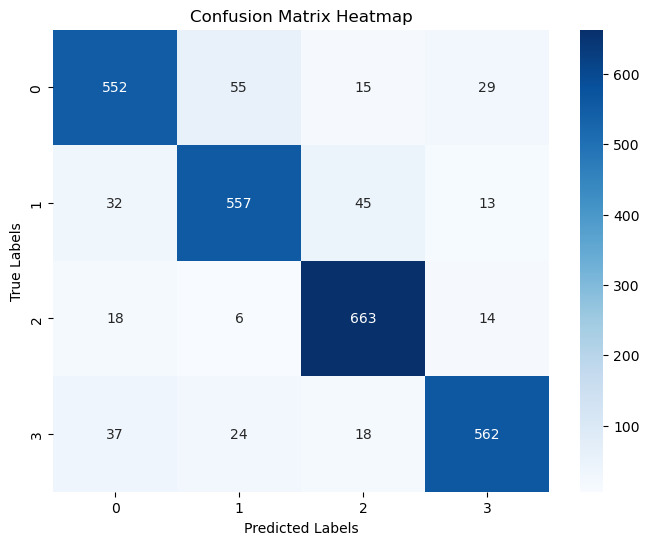

In [136]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Second model using the RBF kernel.

In [137]:
model_2=SVC(kernel="rbf")

In [138]:
model_2.fit(X_train,y_train)

SVC()

In [139]:
y_pred_2=model_2.predict(X_test)
print(f"The Score of 1st model Using kernel=RBF is :{model_2.score(X_test,y_test)}\n")
Report_2= classification_report(y_test,y_pred_2)
print(f"The Classification_Report of 1st model Using kernel=Linear is :\n\n{Report_2}")
print("Number of iterations for model_2:", model_2.n_iter_[-1:])

The Score of 1st model Using kernel=RBF is :0.9094696969696969

The Classification_Report of 1st model Using kernel=Linear is :

              precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.88       651
       Rainy       0.90      0.90      0.90       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.92      0.89      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [140]:
y_pred_2[0:5]


array(['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny'], dtype=object)

In [141]:
y_test[:5].to_numpy()

array(['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny'], dtype=object)

In [142]:
cm_1=confusion_matrix(y_test,y_pred_2)

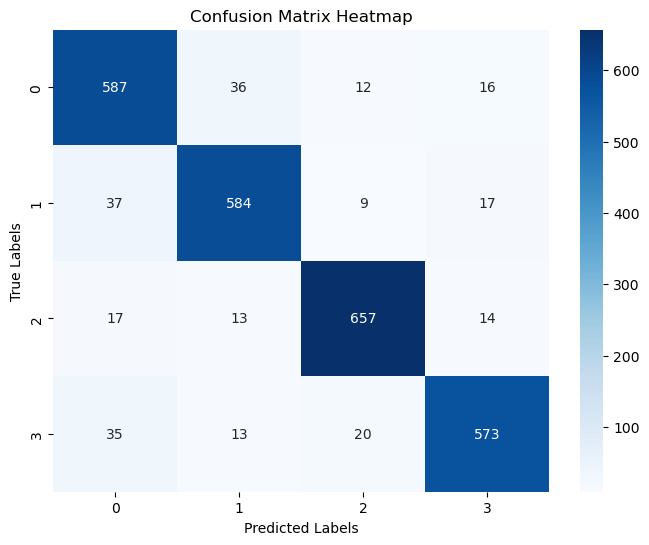

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Third Model Using RBF Kernel and Some Hyperparameter Tunings

In [144]:
model_3=SVC(kernel="rbf",C=0.5,gamma='auto',degree=2)

In [145]:
model_3.fit(X_train,y_train)

SVC(C=0.5, degree=2, gamma='auto')

In [146]:
y_pred_3=model_3.predict(X_test)

In [151]:
print(f"The Score of 1st model Using kernel=RBF is :{model_3.score(X_test,y_test)}\n")
Report_3= classification_report(y_test,y_pred_3)
print(f"The Classification_Report of 1st model Using kernel=Linear is :\n\n{Report_3}")
print("Number of iterations for model_3:", model_3.n_iter_[-1:])

The Score of 1st model Using kernel=RBF is :0.9003787878787879

The Classification_Report of 1st model Using kernel=Linear is :

              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       651
       Rainy       0.89      0.90      0.90       647
       Snowy       0.93      0.93      0.93       701
       Sunny       0.91      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Number of iterations for model_3: [625]


In [149]:
cm_2=confusion_matrix(y_test,y_pred_3)

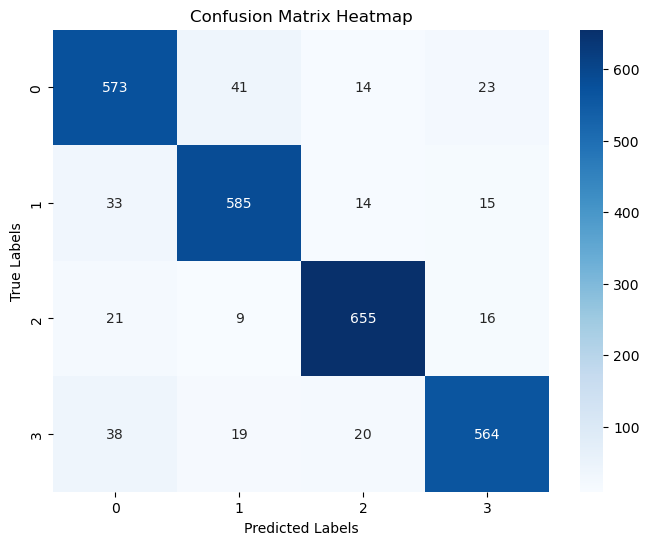

In [150]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Using SK-learns Pipeline

In [153]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])

pipeline.fit(X_train,y_train)

y_pred_pipeline=pipeline.predict(X_test)
print("Pipeline Classification Report:")
print(classification_report(y_test, y_pred_pipeline))

Pipeline Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87       651
       Rainy       0.88      0.90      0.89       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [156]:
Pipeline_Confusion_Matrix=confusion_matrix(y_test, y_pred_pipeline)

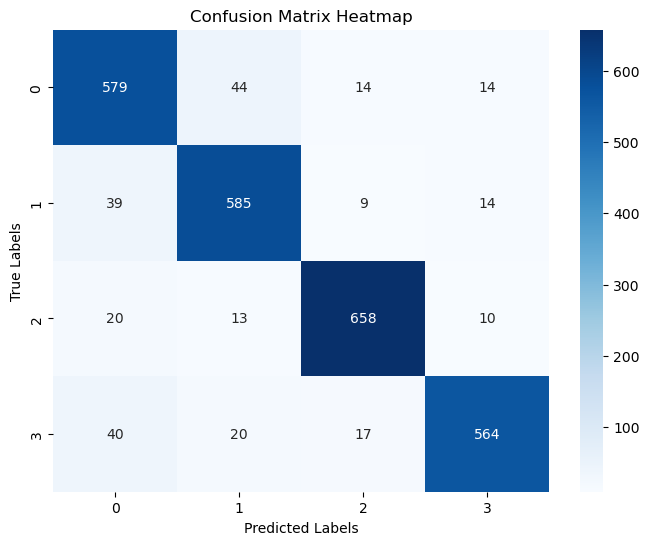

In [157]:
plt.figure(figsize=(8, 6))
sns.heatmap(Pipeline_Confusion_Matrix, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()